# HW 5

This assignment covers Comparision of Decision Trees and Support Vector Machine. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Objective of this assignment is to help you master python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Decision Tree with KFold Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

* [Decision Tree with Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)

* [Support Vector Machine](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)


# Data Processing

**Q1** Get training data from the dataframe
1. Load HW5_data.csv from ```data'' folder into the dataframe
2. Check if there is any NaN in the dataset
3. Remove the rows with NaN values.
4. Print how many examples belong to each class in the data frame.

**A1** Replace ??? with code in the code cell below

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv('C:\\Users\\alsae\\Desktop\\fake\\2024Spring\\data\\HW5_data.csv')
df.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [4]:
# check if there is NaN in the dataset
df.isnull().values.any()

True

In [6]:
#Drop NaNs if there is any
df = df.dropna()

# Count number of entries for different target_class
print(df['target_class'].value_counts())

0.0    8423
1.0     850
Name: target_class, dtype: int64


**Q2** Separate training and testing data from the dataframe

1. Assign values of ```target_class``` column to ```y```, note you have to use ```.values``` method
2. Drop ```target_class``` column from data frame,
3. Assign df values to x
4. Split dataset into train and test data use train_test_split with test_size = 0.25, stratify y and random_state = 1238

**A2** Replace ??? with code in the code cell below

In [8]:
# Assign values of ```target_class``` column to y, note you have to use .values method
y = df['target_class'].values
# Drop 'target_class' column from data frame,
df.drop(columns=['target_class'], inplace=True)
# Assign df values to x
x =df.values
# View shape of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

xtrain, xtest, ytrain, ytest =  train_test_split(x,y,test_size=.25,stratify=y,random_state=1238)

Shape of x: (9273, 8)
Shape of y: (9273,)


# Decision Tree

## Decision Tree with different depth

**Q3** Train DecisionTreeClassifier Model at different depths 
1. Create four [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) models with different parameters. Use max_depth size = 1, 2, 5, 25 & max_leaf_nodes=5, 10, 15, 25 respectively
2. Use random_state=30 & criterion='entropy' for all models
3. Fit the four different models with the train data.
4. Predict the test data using trained models 
5. Calculate the Mean Squared Error(MSE) of each model's prediction
6. Print precision recall curve for the test data with the minimum MSE value from four trianed models.

**A3** Replace ??? with code in the code cell below

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

#create decision tree classifier
clf_1 = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=5, random_state=30, criterion='entropy')
clf_2 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10, random_state=30, criterion='entropy')
clf_3 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=30, criterion='entropy')
clf_4 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=30, criterion='entropy')

#fit classifier model
clf_1.fit(xtrain,ytrain)
clf_2.fit(xtrain,ytrain)
clf_3.fit(xtrain,ytrain)
clf_4.fit(xtrain,ytrain)

#predict
y_pred_1 = clf_1.predict(xtest)
y_pred_2 = clf_2.predict(xtest)
y_pred_3 = clf_3.predict(xtest)
y_pred_4 = clf_4.predict(xtest)

#calculate mean_squared_error
mse_1 = mean_squared_error(ytest, y_pred_1)
mse_2 = mean_squared_error(ytest, y_pred_2)
mse_3 = mean_squared_error(ytest, y_pred_3)
mse_4 = mean_squared_error(ytest, y_pred_4)


min_mse = min(mse_1, mse_2, mse_3, mse_4)

# Print precision-recall curve for the test data with the minimum MSE value from four trained models
if min_mse == mse_1:
    print("Precision-Recall curve for clf_1 (min MSE):")
    # Plot precision-recall curve for clf_1
elif min_mse == mse_2:
    print("Precision-Recall curve for clf_2 (min MSE):")
    # Plot precision-recall curve for clf_2
elif min_mse == mse_3:
    print("Precision-Recall curve for clf_3 (min MSE):")
    # Plot precision-recall curve for clf_3
else:
    print("Precision-Recall curve for clf_4 (min MSE):")
    # Plot precision-recall curve for clf_4

0.0258732212160414 0.0258732212160414 0.02501078050884002 0.0258732212160414
Precision-Recall curve for clf_3 (min MSE):


### Precision-Recall Curve for Best Above

``Important Note:`` If ``from_estimator()`` function gives Attribute error then it means your sklearn is not updated.

* If you are using conda, you can upgrade with

conda upgrade -c conda-forge scikit-learn

* or, with pip,

python -m pip install scikit-learn --upgrade


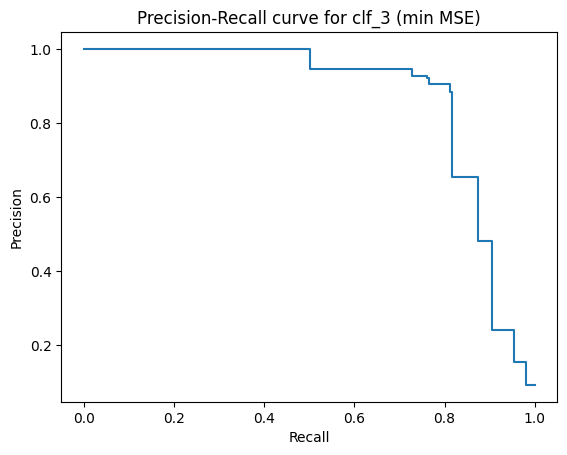

In [12]:
# Use the below one
from sklearn.metrics import precision_recall_curve
# Or this below one, whichever suits you
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

if min_mse == mse_1:
    precision, recall, _ = precision_recall_curve(ytest, clf_1.predict_proba(xtest)[:, 1], pos_label=1)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title("Precision-Recall curve for clf_1 (min MSE)")
    plt.show()

# Precision-recall curve for clf_2
elif min_mse == mse_2:
    precision, recall, _ = precision_recall_curve(ytest, clf_2.predict_proba(xtest)[:, 1], pos_label=1)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title("Precision-Recall curve for clf_2 (min MSE)")
    plt.show()

# Precision-recall curve for clf_3
elif min_mse == mse_3:
    precision, recall, _ = precision_recall_curve(ytest, clf_3.predict_proba(xtest)[:, 1], pos_label=1)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title("Precision-Recall curve for clf_3 (min MSE)")
    plt.show()

# Precision-recall curve for clf_4
else:
    precision, recall, _ = precision_recall_curve(ytest, clf_4.predict_proba(xtest)[:, 1], pos_label=1)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
    plt.title("Precision-Recall curve for clf_4 (min MSE)")
    plt.show()

### Decision Tree with K-fold cross validation

**Q4** Use Kfold on the test dataset, and evaluate the best model
1. Use cross_val_score and fit your best model with k = 5 fold size on test data
2. Calculate average scores in kfold

**A4** Replace ??? with code in the code cell below

In [13]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5)

scores = cross_val_score(clf_3,xtest,ytest,cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.97413793 0.96982759 0.97844828 0.96336207 0.96544276]
Average cross-validation score: 0.97


###  Decision Tree with Bagging 

**Q5** Now we will use Bagging technique on the our previous best model, and evaluate it

```Part 1:```
1. Now, Create a Bagged Model passing  ```model = previous_best, n_estimators = 10 & random_state=1 to BaggingClassifier()```
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the test MSE 
5. Plot Precision-Recall Curve from the true & predicted test data

**A5** Replace ??? with code in the code cell below

In [17]:
from sklearn.ensemble import BaggingClassifier

# Use BaggingRegressor to fit the training data
# Calculate the mean squared error 

#load BaggingRegressor model and pass n_estimators=10, random_state=1
bagged_clf = bagged_clf = BaggingClassifier(base_estimator=clf_3, n_estimators=10, random_state=1)
bagged_clf.fit(xtrain, ytrain)
pred = bagged_clf.predict(xtest)

mse_bagged = mean_squared_error(ytest, pred)
print("Test MSE for Bagged Model:", mse_bagged)


C:\Users\alsae\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test MSE for Bagged Model: 0.02630444156964209


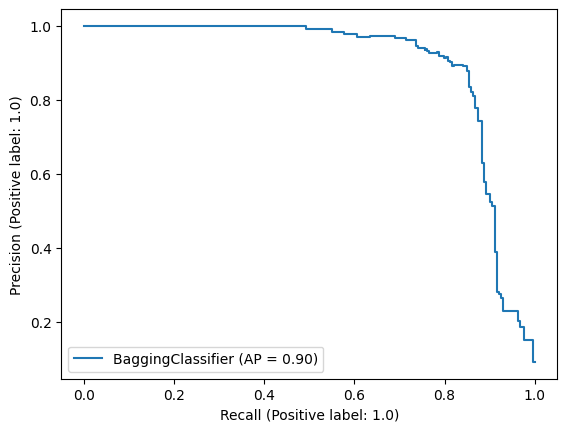

In [15]:
#pass necessary parameters to PrecisionRecallDisplay.from_estimator() 

PrecisionRecallDisplay.from_estimator(bagged_clf, xtest, ytest)


```Part 2: ```

1. Why BaggingClassifier is called an ensembled technique? why it works better most of the time than the single model classifiers?

#### BaggingClassifier is termed an ensemble technique because it combines predictions from multiple base learners, such as decision trees, to form a more robust model. It works better than single model classifiers by reducing variance through aggregation, mitigating overfitting, and improving generalization by capturing diverse aspects of the data across multiple models.

2. What is the disadvantage of incresing the number of estimators while using BaggingClassifier? Explain with an appropriate example.

#### Increasing the number of estimators in BaggingClassifier can lead to higher computational complexity and longer training times, as each estimator requires resources to train and make predictions. Additionally, adding more estimators may result in diminishing returns in performance improvement, as the model may start overfitting to the training data. For example, if we increase the number of decision tree estimators in BaggingClassifier excessively, each tree may start memorizing noise or idiosyncrasies in the training set, leading to a decrease in generalization performance on unseen data.


# Support Vector Machine(SVM)

**Q6** Create SVM Model on the training set, and do the following

```Part:1```
1. Now, Create a SVM Model with default parameters
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the model accuracy on test data
5. Plot confusion matrix on the test data  (Make font size 16)


**A6** Replace ??? with code in the code cell below

In [19]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc= SVC()

# fit classifier to training set
svc.fit(xtrain,ytrain)


# make predictions on test set
y_pred = svc.predict(xtest)

# compute and print accuracy score

accuracy = accuracy_score(ytest,y_pred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy))

Model accuracy score with default hyperparameters: 0.9685


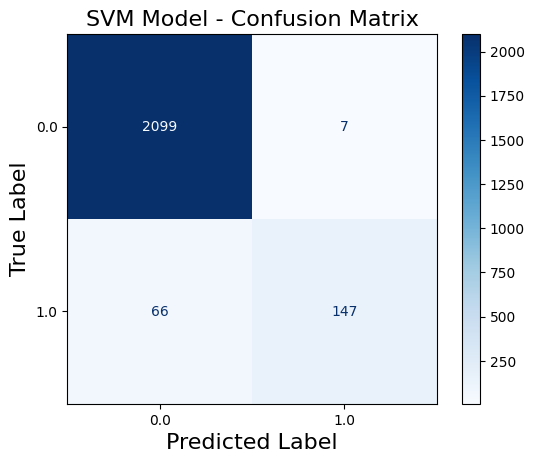

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay,  confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("SVM Model - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()

```Part2:```

1. From the above Confusion Matrix we can see that high number of Class 1 is predicted as Class 0 from the model. What is your reasoning behind this situtation? 

#### The high number of Class 1 instances predicted as Class 0 suggests an imbalance in the dataset, where Class 0 is more common than Class 1. This imbalance causes the model to lean towards predicting the majority class more often, resulting in misclassifications of Class 1 instances as Class 0. To address this, techniques like resampling or using algorithms robust to class imbalances can help improve predictions for the minority class.

2. What can be done in order to resolve this issue?

#### To resolve this issue, techniques such as resampling methods (like oversampling the minority class or undersampling the majority class) or using algorithms robust to class imbalances (such as ensemble methods or algorithm-specific techniques) can be employed.

## SVM with high margin

**Q7** Create SVM Model on the training set, and evaluate

``Note:``
1. If we analyze our dataset using df.describe() function, we will see that there are many outliers in the dataset.
2. So, we need to increase our margin with ```HIGH C``` values so that the SVM model get better generalization

``Task:``

1. Now, Create a SVM Model with rbf kernel and C=100
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the model accuracy on test data 
5. Plot Confusion Matrix from the true & predicted test data (Make font size 16)


**A7** Replace ??? with code in the code cell below


In [21]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(kernel='rbf', C=100)


# fit classifier to training set
svc.fit(xtrain,ytrain)


# make predictions on test set
y_pred = svc.predict(xtest)


# compute and print accuracy score
accuracy = accuracy_score(ytest, y_pred)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy))

Model accuracy score with rbf kernel and C=100.0 : 0.9733


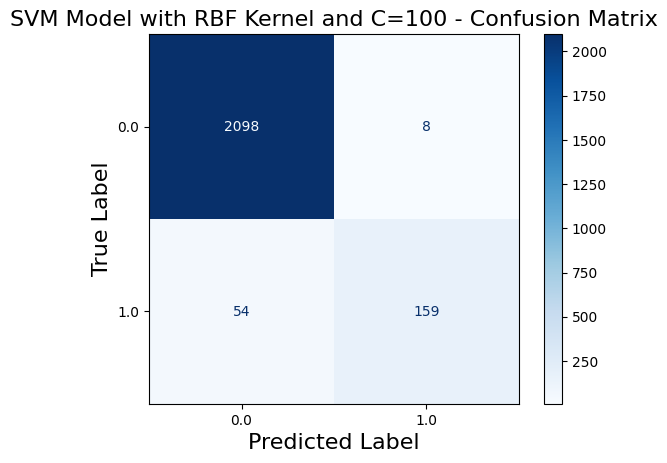

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as pl

cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("SVM Model with RBF Kernel and C=100 - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()

## SVM with linear kernel

**Q8** Create SVM Model on the training set, and evaluate

``Task:``

1. Now, Create a SVM Model with linear kernel and C=1.0
2. Fit the model with the train data
3. Predict the values with the test data
4. Calculate the model accuracy on test data
5. Plot Confusion Matrix from the true & predicted test data (Make font size 16)


**A8** Replace ??? with code in the code cell below


In [24]:
# instantiate classifier with linear kernel and C=1.0
linear_svc= SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(xtrain,ytrain)


# make predictions on test set
y_pred = linear_svc.predict(xtest)


# compute and print accuracy score
accuracy = accuracy_score(ytest, y_pred)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy))

Model accuracy score with linear kernel and C=1.0 : 0.9741


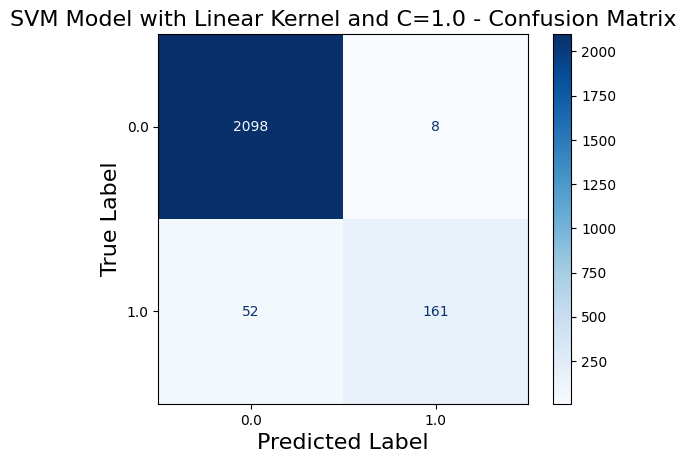

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as pl

cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear_svc.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("SVM Model with Linear Kernel and C=1.0 - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()

**Q9** Create a Grid Search for finetuning the value of ```C``` in SVM Model on the ```training set```,

``Task:``

1. Now, Create a SVM Model with linear kernel and evaluate the model for different values of C. ```Use 'C': [0.01, 0.1, 5, 10, 100]```
2. Use the [sklearn GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) method for finetuning the ```linear SVM```.
3. Use ```3``` fold of Cross Validation
4. Use ```accuracy``` as the scoring technique
5. Use ```clf.cv_results_ & clf.best_params_``` for getting the fine-tuned results from the Cross Validation run.
5. Now, Plot the Confusion Matrix for test data, using the ```best value of C``` we found from our finetune.  

Note: The Grid Search may take couple of minutes. Please wait untill the cell compiles

**A9** Replace ??? with code in the code cell below


In [26]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = {'C': [0.01, 0.1, 5, 10, 100]}
linear_svc = SVC(kernel='linear')
clf = GridSearchCV(linear_svc, tuned_parameters, cv=3, scoring='accuracy')
clf.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 5, 10, 100]}, scoring='accuracy')

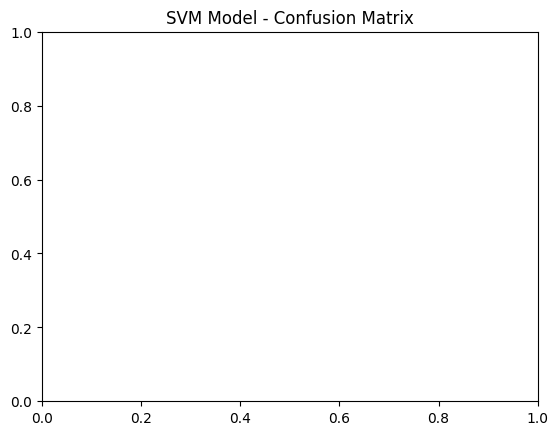

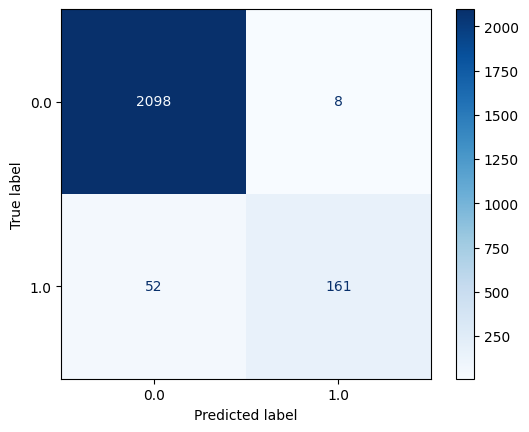

Best parameters found by Grid Search: {'C': 5}


In [27]:
best_model= clf.best_estimator_
y_pred = best_model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
plt.title("SVM Model - Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

# Print the best parameters found by Grid Search
print("Best parameters found by Grid Search:", clf.best_params_)

### We can see that after using the Best Value of ```C```, we have less amount of false positive in our test data prediction.